# Automatic Data Preprocessing

This is a simple case study of automatic data cleaning. Only simple heuristic approaches are used here.

In [2]:
"""
Automatic data cleaning
"""

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

## Get data
Get data from the csv file and show data to have a general idea of how the dataset looks like.

In [3]:
def get_data(file):
    """
    load dataset into a DataFrame
    """
    
    # Read the file into a DataFrame: df
    dataframe = pd.read_csv(file)
    return dataframe

def show_data(dataframe, complete=False):
    """
    Print the data frame
    """
    if complete:
        # Print complete df
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(dataframe)
    else:
        # Print part of df
        print(dataframe.head())    

In [4]:
df = get_data('tips.csv')
show_data(df, complete = False)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Reoprt data
Generate a general report, more details can be obtained by setting the parammeter "detailed" to "True"

In [5]:
def report_data(dataframe, detailed=False):
    """
    Show a concise summary
    """
    variable_type = {}
    unique_count = {}
    missing_observation = {}
    for col in dataframe.columns:
        # Type of each variable
        variable_type[col] = dataframe[col].dtypes
        # Unique count of each variable
        unique_count[col] = dataframe[col].nunique()
        # Missing pecentage
        missing_observation[col] = (len(dataframe.index)-dataframe[col].count()) / len(dataframe.index)
        #print("# uniques values of {:<10} is {:>4}".format(col, data[col].nunique()))
        #print(dataframe[col].value_counts(dropna=False).head())   
    #print(variable_type)  
    #print(unique_count)
    #print(missing_observation)
    
    # Merge multiple dictionaries with the same key
    # A general solution that will handle an arbitrary amount of dictionaries,
    # with cases when keys are in only some of the dictionaries
    dict_summary = collections.defaultdict(list)
    for dict in (unique_count, variable_type, missing_observation):
        for key, value in dict.items():
            dict_summary[key].append(value)
    #print(dict_summary)
    
    # dictionary to tabular data structure
    df = pd.DataFrame(dict_summary,
                      index=["# unique values", "Variable type", "Missing_observation"],
                      columns = dataframe.columns)
    # print summary table
    print("*************")
    print("Summary Table")
    print("*************")
    # tranpose table
    print(df.T)
    print("")
    
    
    # if boolean tailed = true, show more details
    if detailed:
        print("Data Describing")
        print("====================")
        print(dataframe.describe())
        print("")
        print("Additional Information")
        print("================")
        dataframe.info()
        print("")
        print("Unique values for each variable")
        print("===============================")
        for col in dataframe.columns:
            print("# uniques values of {:<10} is {:>4}".format(col, dataframe[col].nunique()))
            print(dataframe[col].value_counts(dropna=False))
            print("")

In [6]:
report_data(df, detailed = False)

*************
Summary Table
*************
           # unique values Variable type Missing_observation
total_bill             229       float64                   0
tip                    123       float64                   0
sex                      2        object                   0
smoker                   2        object                   0
day                      4        object                   0
time                     2        object                   0
size                     6         int64                   0



## Visualize data
Visualize the distribution of each variable.Histograms for numeric data and bar charts for categorical data.

In [7]:
def visualize_data(df):
    """
    Visualize the distribution of each variable
    Histograms for numeric data
    Bar charts for categorical data
    """
    # Show distribution by histograms and bar charts
    for col in df.columns:
        # plot histograms for numeric data
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
            plt.figure()
            plt.title("{}".format(col))
            df[col].plot(kind='hist')
            #plt.hist(df[col].dropna())
        # plot bar charts for categorical data
        else:
            #df[col].plot('hist')
            #plt.show()
            #print(df[col].value_counts(dropna=False))
            plt.figure()
            plt.title("{}".format(col))
            plt.ylabel("Count")
            df[col].value_counts(dropna=False).plot(kind='bar')
    plt.show()

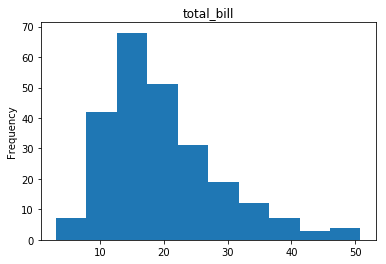

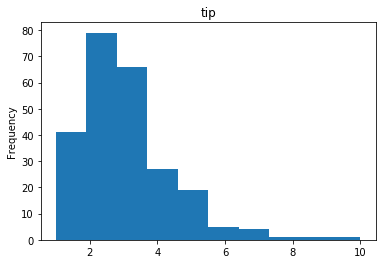

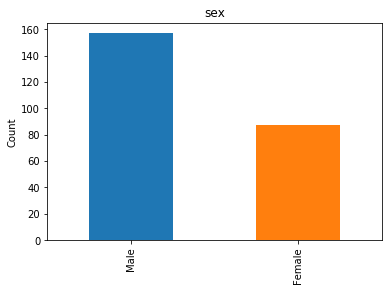

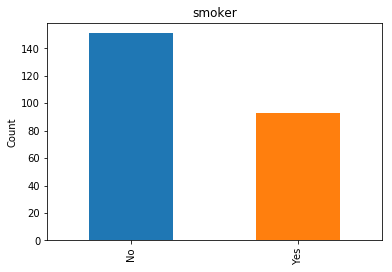

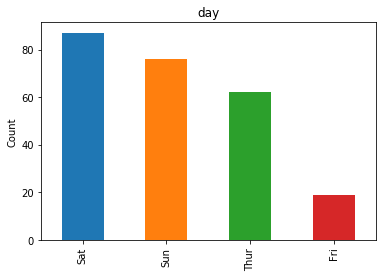

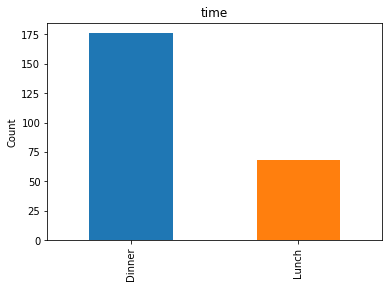

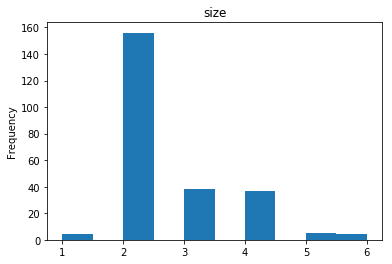

In [8]:
visualize_data(df)

## Diagnose data
Detect common data problems, e.g., duplicated rows, missing values and outliers.

In [9]:
def identify_duplicated_rows(dataframe):
    """
    Identify duplicated rows
    """
    
    # Mark duplicated rows with True
    mark = dataframe.duplicated(keep=False)
    #print(mark)
    
    # Duplicated rows detected then set duplicated 'True' 
    duplicated = False
    for bool in mark:
        if bool:
            duplicated = True
    
    # Show duplicated rows if there are
    # Otherwise show no duplicated rows
    if duplicated:
        print("Duplicated rows detected")
        print("========================")
        print(dataframe[mark])
        print("")
    else:
        print("No duplicated rows")
        print("")

def identify_missing_values(dataframe, detailed=False):
    missing_count = {}
    flag = False
    for col in dataframe.columns:
        # Missing count
        missing_count[col] = len(dataframe.index)-dataframe[col].count()
        if missing_count[col] != 0:
            flag = True
            if detailed:
                print("There are {} missing values for variable {}".format(missing_count[col],col))
        else:
            if detailed:
                print("No missing values detected for variable {}".format(col))
    if flag:
        print("")
        print("Missing value detected")
    else:
        print("")
        print("No missing value detected")

def identify_outliers(df, variable=None, groupby=None, detailed=False):
    """
    Indentify outliers by show box plot
    """
    
    # Draw box plot for numeric variable
    # Outliers can be shown
    df.boxplot(column=variable, by=groupby)
    plt.draw()
    
    df_outliers = {}
    flag = False
    for col in df.columns:
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
            #keep only the ones that are out of +3 to -3 standard deviations in the column 'Data'.
            df_outliers[col] = df[~(np.abs(df[col]-df[col].mean())<(3*df[col].std()))]
            if len(df_outliers[col]) != 0:
                flag = True
                if detailed:                    
                    print("There are {} outliers in variable {}".format(len(df_outliers[col]), col))
                    print(df_outliers[col])
                    print("")
                    #print(len(df_outliers))
            else:
                if detailed:
                    print("No outliers are detected in variable {}".format(col))
                    print("")
    
    if flag:
        print("Outliers detected")
        print("")
    else:
        print("No outliers detected")
        print("")
    plt.show()
    
def identify_name_consistency(dataframe):
    """
    Identify if column names are consistent
    """
    print("")
    print("Column names")
    print("============")
    print(dataframe.columns)
    print("")
    
    if all(col[0].isupper() for col in dataframe.columns):
        print("Column names consistent")
    elif all(col[0].islower() for col in dataframe.columns):
        print("Column names consistent")
    else:
        print("Column names not consistent")
        
def diagnose_data(dataframe):
    """
    Deal with common data problems
    like missing data, duplicate rows and so on
    """
    print(dataframe.head())
    
    # Identify inconsistent column names
    print("")
    print("***********************************")
    print("Detecting inconsistent column names")
    print("***********************************")
    print("")
    identify_name_consistency(dataframe)
    
    # Identify the duplicates
    print("")
    print("*************************")
    print("Detecting duplicated rows")
    print("*************************")
    print("")
    identify_duplicated_rows(dataframe)

    # Identify potential outliers
    print("")
    print("******************")
    print("Detecting outliers")
    print("******************")
    print("")
    identify_outliers(dataframe,detailed=True)
    
    # Identify missing values
    print("")
    print("************************")
    print("Detecting missing values")
    print("************************")
    print("")
    identify_missing_values(dataframe, detailed=True)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

***********************************
Detecting inconsistent column names
***********************************


Column names
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Column names consistent

*************************
Detecting duplicated rows
*************************

Duplicated rows detected
     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


******************
Detecting outliers
******************

There are 4 outliers in variable total_bill
     total_bill    tip   sex smoker  day    time  size
59        48.

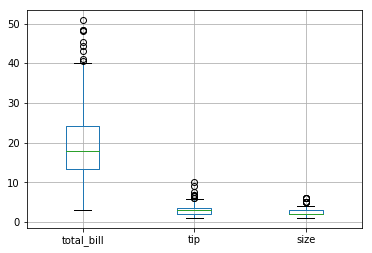


************************
Detecting missing values
************************

No missing values detected for variable total_bill
No missing values detected for variable tip
No missing values detected for variable sex
No missing values detected for variable smoker
No missing values detected for variable day
No missing values detected for variable time
No missing values detected for variable size

No missing value detected


In [10]:
diagnose_data(df)

## Clean data
Clean data in an interactive manner.

In [11]:
def convert_type(dataframe, col=None, type=None):
    """
    Converting data type of a specific variable
    """
    dataframe[col] = dataframe[col].astype(type)
    return dataframe

        
def drop_missing_values(dataframe):
    """
    Drop rows containing missing values
    """
    dataframe_missing_dropped = dataframe.dropna()
    return dataframe_missing_dropped

def fill_missing_values(dataframe, fillingvalue = None, col = None):
    """
    Fill missing values with specific value
    If no value is specified,
    fill numeric type varible with mean();
    fill category type varible with 'missing'
    """
    if fillingvalue != None:
        if col != None:
            dataframe[col] = dataframe[col].fillna(fillingvalue)
        else:
            dataframe = dataframe.fillna(fillingvalue)
    else:
        for col in dataframe.columns:
            if(dataframe[col].dtype == np.float64 or dataframe[col].dtype == np.int64):
                mean_value=dataframe[col].mean()
                dataframe[col] = dataframe[col].fillna(mean_value)
            else:
                dataframe[col] = dataframe[col].fillna('missing')
    print("")
    print("Missing values filled")
    #print(dataframe)
    return dataframe            
            
def clean_duplicated_rows(dataframe):
    """
    Drop with duplicatd rows
    """
    # Drop the duplicates
    dataframe_no_duplicate = dataframe.drop_duplicates()
    #print(dataframe_no_duplicate)
    return dataframe_no_duplicate
   

Test for data cleaning.

In [19]:
"""
Tests for automatic data cleaning
"""
import datacleaner as dc
import pandas as pd
import numpy as np

def main_test():
    """
    Tests for read file, show data, report data and visualize data
    Always run first
    """
    # General test
    df = dc.get_data('tips.csv')
    dc.show_data(df, False)
    #dc.visualize_data(df)
    dc.diagnose_data(df)
    dc.report_data(df, False)

def typeconvert_test():
    """
    Test for converting data type
    """
    # The type for 'sex' in 'tips.csv'
    # should be category instead of object
    df1 = dc.get_data('tips.csv')
    dc.report_data(df1, False)
    df1 = dc.convert_type(df1, 'sex', 'category')
    dc.report_data(df1, False)

def duplicated_test():
    """
    Test for dropping duplicated rows
    """
    # Generate a dataframe with duplicated rows   
    d = {'col1': [1, 2, 2, 5], 'col2': [3, 4, 4, 7],
         'col3': [3, 9, 9, 8], 'col4': [2, 13, 13, 28]}
    df2 = dc.pd.DataFrame(data=d)
    print("Original data")
    print("=============")
    print(df2)
    print("")
    dc.identify_duplicated_rows(df2)
    df2 = dc.clean_duplicated_rows(df2)
    print("After dropping duplicated rows")
    print("==============================")
    print(df2)

def outlier_test():
    """
    Test for detecting outliers
    """
    # Generate a random dataframe
    df3 = pd.DataFrame({'Data':np.random.normal(size=200)})
    # Create a few outliers (3 of them, at index locations 10, 55, 80)
    df3.iloc[[10, 55, 80]] = 40
    print(df3)
    dc.identify_outliers(df3)

def drop_missing_test():
    """
    Test for dropping missing values
    """
    df = get_data('airquality.csv')
    df.info()
    identify_missing_values(df)
    df2 = drop_missing_values(df)
    df2.info()

def filling_missing_test():
    """
    Test for filling missing values
    """
    df = dc.get_data('airquality.csv')
    print("Orignial data")
    print(df.head())
    dc.identify_missing_values(df)
    df = dc.fill_missing_values(df, "missing", "Ozone")
    print(df.head())
    
def consistency_test():
    """
    Test for detecting inconsitent column names
    """
    df = dc.get_data('airquality.csv')
    df = df.rename(index=str, columns={"Ozone": "ozone"})
    print(df)
    dc.identify_name_consistency(df)

*************
Summary Table
*************
           # unique values Variable type Missing_observation
total_bill             229       float64                   0
tip                    123       float64                   0
sex                      2        object                   0
smoker                   2        object                   0
day                      4        object                   0
time                     2        object                   0
size                     6         int64                   0

*************
Summary Table
*************
           # unique values Variable type Missing_observation
total_bill             229       float64                   0
tip                    123       float64                   0
sex                      2      category                   0
smoker                   2        object                   0
day                      4        object                   0
time                     2        object                   0


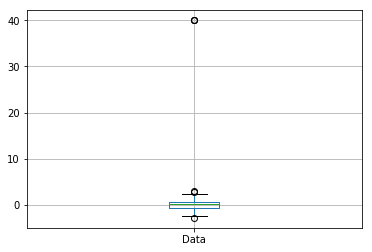

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB

Missing value detected
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 6 columns):
Ozone      111 non-null float64
Solar.R    111 non-null float64
Wind       111 non-null float64
Temp       111 non-null int64
Month      111 non-null int64
Day        111 non-null int64
dtypes: float64(3), int64(3)
memory usage: 6.1 KB
Orignial data
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

Missing value detected

Missi

In [20]:
typeconvert_test()
duplicated_test()
consistency_test()
outlier_test()
drop_missing_test()
filling_missing_test()

## Detect data type
Automatically detect data type for each feature

In this case study, the data type detecting is based on the assumption that the dataset is clean, that is, common data problems such as missing values and outliers have been dealt with already.

In [12]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

The data type detected by pandas are very general as we can see from "object". We need the data type to be more concrete and precise.

In [34]:
# Import all relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [35]:
def infer_object(feature):
    """
    Infer data types for features with "object" data type
    Possible data types to infer: boolean, date, float, integer, string
    Feature that is not either a boolean, a date, a float or an integer, is classified as a string
    """
    data_type = ""
    types = ["date","float64","int64","string"]
    weights = [0,0,0,0] #Weights corresponding to the data types
    
    feature_len = len(feature)
    
    indices_number = 100 #Number of different values to check in a feature
    indices = random.sample(range(0,feature_len), min(indices_number,feature_len)) #Array of random indices
    
    # If the feature only contains two different unique values, then infer it as boolean
    if len(pd.unique(feature)) == 2:
        data_type = "bool"
    else:
        for i in indices:
            try:
                if (len(feature[i]) <= 10 
                    and (((feature[i][2:3]=='-' or feature[i][2:3]=='/') 
                    and (feature[i][5:6]=='-' or feature[i][5:6]=='/')) 
                    or ((feature[i][4:5]=='-' or feature[i][4:5]=='/')
                    and (feature[i][7:8]=='-' or feature[i][7:8]=='/')))):
                    weights[0] += 1 #Date
                else:
                    weights[3] += 1 #String
            except (TypeError,ValueError,IndexError):
                try:
                    int(feature[i])
                    if ('.' in str(feature[i])):
                        weights[1] += 1 #Float
                    else:
                        weights[2] += 1 #Integer
                except (TypeError,ValueError,IndexError):
                    weights[3] += 1 #String
    
        #print ("Date: {}, Float64: {}, Int64: {}, String: {}".format(weights[0],weights[1],weights[2],weights[3])) #For debugging purposes
        data_type = types[weights.index(max(weights))]
        
    return data_type

In [36]:
def detect_data_type(df):
    """
    Automatically infer data types for each feature in the dataframe
    """
    result = []
    
    for column in df:
        if (df.dtypes[column] == "object"):
            #print ("Trying to automatically infer the data type of the",column,"feature...") #For debugging purposes
            type_inferred = infer_object(df[column])
            result.append(type_inferred)
            #print ("Result:",inferredType) #For debugging purposes
        elif (df.dtypes[column] == "int64"):
            if (len(pd.unique(df[column])) == 2):
                result.append("bool")
            else:
                result.append("int64")
        else:
            # The only remaining data type is 'float64', which needs no special treatment
            result.append("float64")
        
    return result

In [37]:
df = get_data("tips.csv")
print(df.head())
predicted = detect_data_type(df)
print ("\nPredicted data types:\n",predicted)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Predicted data types:
 ['float64', 'float64', 'bool', 'bool', 'string', 'bool', 'int64']
